In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datatable as dt

In [3]:
pip install datatable 

## [RQ2] Let's explore the dataset by finding simple insights regarding the profile and posts.

## Plot the number of posts for each profile in descending order.

#### We take only the columns of interest to us from our DataFrame 'instagram_profiles.csv' to give an answer to all these questions below.

In [2]:
prof_data = dt.fread('instagram_profiles.csv', sep='\t', columns={"profile_name", "firstname_lastname", "n_posts", "is_business_account"}).to_pandas()

In [3]:
prof_data

,profile_name,firstname_lastname,n_posts,is_business_account
0,jphillip033,John Pierce,170.0,False
1,mama_haas,Deanna,2878.0,False
2,yellowlightbreen,Eliza Gray,431.0,False
3,tec1025,Thomas Clark,NaN,NaN
4,luckyfluff,,NaN,NaN
...,...,...,...,...
4509581,karenarkesteyn,Karen Arkesteyn,497.0,False
4509582,jornvlaeminck,Jorn Vlaeminck,NaN,NaN
4509583,s_degol,Sanne Degol,NaN,NaN
4509584,anwilms,An Wilms,183.0,False


#### As we could see in RQ1, in the DataFrame there are many NaN values so now we remove the row of  prof_data where such 'non-values' are present in these columns and then we want to sort these in descending order.

In [4]:
prof_posts = prof_data[['profile_name', 'n_posts']].dropna().sort_values("n_posts", ascending=False)

In [5]:
prof_posts

,profile_name,n_posts
3990313,jasem33312,183730.0
2571453,koenigpic,142428.0
4338921,rudyanto62,126340.0
3942129,hometown_ni,125220.0
4219642,dwfitfiber_thailand,117262.0
...,...,...
2402230,faith.dever,0.0
2402229,sugarsprinkledglitter,0.0
377966,hannahkraft13,0.0
2402225,4pf_cj_,0.0


In [6]:
prof_posts['n_posts'] = prof_posts['n_posts'].astype(int)

In [7]:
prof_posts

,profile_name,n_posts
3990313,jasem33312,183730
2571453,koenigpic,142428
4338921,rudyanto62,126340
3942129,hometown_ni,125220
4219642,dwfitfiber_thailand,117262
...,...,...
2402230,faith.dever,0
2402229,sugarsprinkledglitter,0
377966,hannahkraft13,0
2402225,4pf_cj_,0


#### As a final step, let's graph the top 100 profiles with the most posts to take a look of how many posts were posted by them.

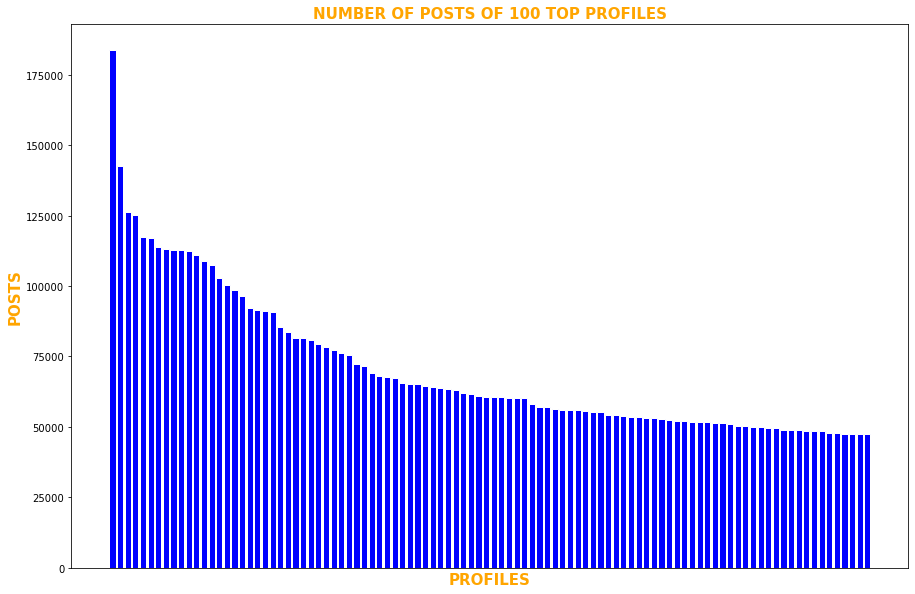

In [8]:
plt.figure(figsize=(15,10))
plt.bar(prof_posts.profile_name[:100], prof_posts.n_posts[:100], color='blue', edgecolor='white', align='center')
plt.title('NUMBER OF POSTS OF 100 TOP PROFILES', fontweight='bold', color = 'orange', fontsize='15')
plt.xlabel('PROFILES', fontweight='bold', color = 'orange', fontsize='15')
plt.ylabel('POSTS', fontweight='bold', color = 'orange', fontsize='15')
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.show()

## What posts have the highest number of "likes"?

####  We take only the columns of interest to us from our DataFrame 'instagram_posts.csv' to give an answer to all these questions below.

In [9]:
post_data = dt.fread('instagram_posts.csv', sep='\t', columns={"post_id", "numbr_likes", "number_comments", "location_id", "post_type"}).to_pandas()

In [10]:
post_likes= post_data[['post_id', 'numbr_likes']]
post_likes

,post_id,numbr_likes
0,BXdjjUlgcgq,80.0
1,BVg0pbolYBC,25.0
2,BRgkjcXFp3Q,9.0
3,BKTKeNhjEA7,4.0
4,8-NQrvoYLX,8.0
...,...,...
42710192,BcpWMWGBfxh,74.0
42710193,Ba6LZWwlCl8,49.0
42710194,BPN0kM1hYUw,18.0
42710195,BxsZ8nDBr-L,27.0


#### Here we show what are the first 25 posts with the highest number of likes.

In [11]:
post_likes = post_likes.dropna().sort_values("numbr_likes", ascending=False)
post_likes['numbr_likes'] = post_likes['numbr_likes'].astype(int)
post_likes.head(25)

,post_id,numbr_likes
19624085,Bt3yaXmAM0d,8822952
19623988,BuwffB7g8cK,5447066
19624082,Buc1gyZAaMQ,5116398
19623986,BvcukE8AMuG,4271466
39701024,BqSLFVBFLfq,4264745
6293907,BwTSXBKg7gN,3586546
19624086,Btw8pFXAvQm,3558599
19802016,BvC3n6_gqin,3533326
30850564,Bw7vqLrFkHi,3340297
39812576,Bw2gTH1AiDA,3311246


#### Plot that represents the number of likes of 100 top posts.

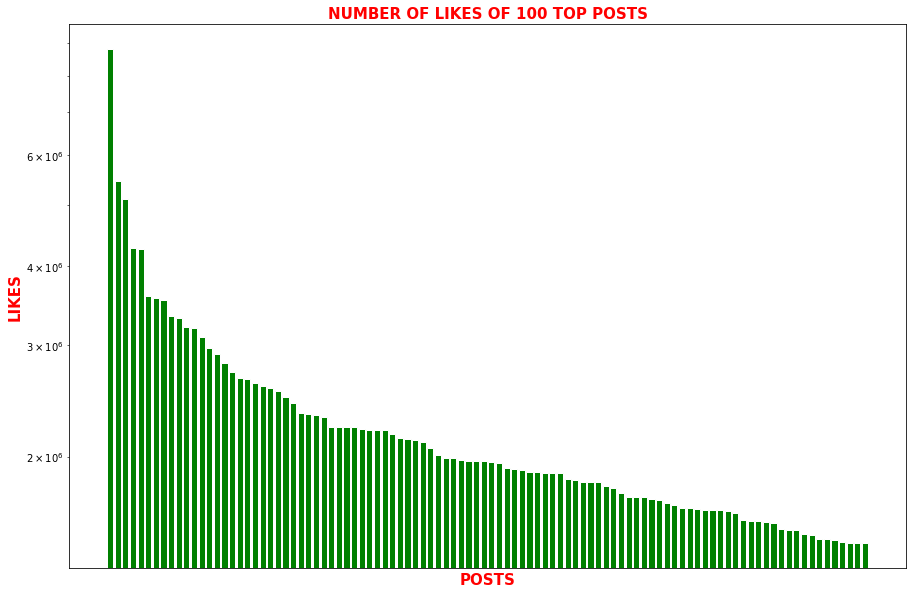

In [12]:
plt.figure(figsize=(15,10))
plt.bar(post_likes.post_id[:100], post_likes.numbr_likes[:100], color='green', edgecolor='white', align='center', log=True)
plt.title('NUMBER OF LIKES OF 100 TOP POSTS', fontweight='bold', color = 'red', fontsize='15')
plt.xlabel('POSTS', fontweight='bold', color = 'red', fontsize='15')
plt.ylabel('LIKES', fontweight='bold', color = 'red', fontsize='15')
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.show()

## What posts have the most and the least number of comments?

In [13]:
post_comms = post_data[['post_id','number_comments']].dropna()

In [14]:
post_comms['number_comments'] = post_comms['number_comments'].astype(int)
post_comms

,post_id,number_comments
0,BXdjjUlgcgq,0
1,BVg0pbolYBC,1
2,BRgkjcXFp3Q,0
3,BKTKeNhjEA7,0
4,8-NQrvoYLX,0
...,...,...
42710192,BcpWMWGBfxh,0
42710193,Ba6LZWwlCl8,0
42710194,BPN0kM1hYUw,0
42710195,BxsZ8nDBr-L,1


In [15]:
most_comms = post_comms[post_comms['number_comments'] == post_comms.number_comments.max()]
most_comms

,post_id,number_comments
41873060,Bx2sPAjHviO,488953


In [16]:
least_comms = post_comms[post_comms['number_comments'] == post_comms.number_comments.min()]

In [17]:
least_comms

,post_id,number_comments
0,BXdjjUlgcgq,0
2,BRgkjcXFp3Q,0
3,BKTKeNhjEA7,0
4,8-NQrvoYLX,0
11,Bx-ptmpinBs,0
...,...,...
42710190,BpeRbppFQ2l,0
42710191,Bdx3o7WDypu,0
42710192,BcpWMWGBfxh,0
42710193,Ba6LZWwlCl8,0


In [18]:
print(f" Post: {most_comms.iloc[0, :].post_id} has the most number of comments: {most_comms.iloc[0, :].number_comments}")
print(f" {least_comms.iloc[0, :].post_id} is the first post which has the least number of comments: {least_comms.iloc[0, :].number_comments}")

 Post: Bx2sPAjHviO has the most number of comments: 488953
 BXdjjUlgcgq is the first post which has the least number of comments: 0


## How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

In [19]:
loc_data = post_data[['post_id', 'location_id']]
loc_data

,post_id,location_id
0,BXdjjUlgcgq,1.022366e+15
1,BVg0pbolYBC,4.574268e+14
2,BRgkjcXFp3Q,4.574268e+14
3,BKTKeNhjEA7,4.574268e+14
4,8-NQrvoYLX,4.574268e+14
...,...,...
42710192,BcpWMWGBfxh,4.574268e+14
42710193,Ba6LZWwlCl8,4.574268e+14
42710194,BPN0kM1hYUw,4.574268e+14
42710195,BxsZ8nDBr-L,4.267235e+06


#### Count how many posts have or not have tagged locations with .isna and .notna commands. Then we create this small DataFrame.

In [20]:
unlocated = loc_data.location_id.isna().sum()
located = loc_data.location_id.notna().sum()
results = {'location':[True,False], 'n_posts' : [located, unlocated]}
post_loc = pd.DataFrame(results)
post_loc

,location,n_posts
0,True,29737425
1,False,12972772


#### Show it as a barplot.

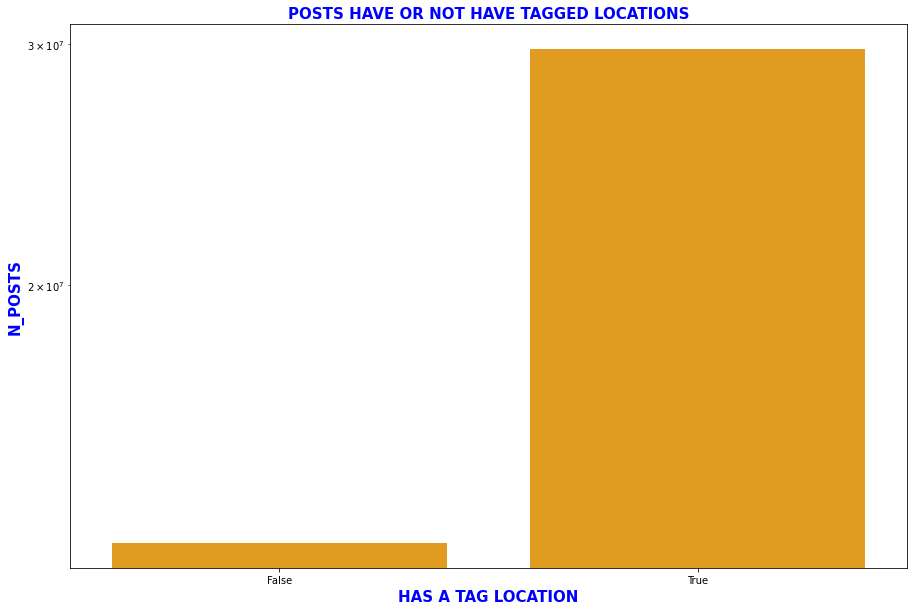

In [21]:
plt.figure(figsize=(15,10))
sns.barplot(
    y="n_posts", 
    x="location", 
    data=post_loc, 
    estimator=sum, 
    ci=None, 
    color='orange',
    log=True)
plt.title("POSTS HAVE OR NOT HAVE TAGGED LOCATIONS", fontweight='bold', color = 'blue', fontsize='15')
plt.xlabel('HAS A TAG LOCATION', fontweight='bold', color = 'blue', fontsize='15')
plt.ylabel('N_POSTS', fontweight='bold', color = 'blue', fontsize='15')
plt.show()

## How many posts include only photos? How many also have videos?

In [22]:
types = post_data[['post_id', 'post_type']]
types

,post_id,post_type
0,BXdjjUlgcgq,2
1,BVg0pbolYBC,1
2,BRgkjcXFp3Q,1
3,BKTKeNhjEA7,1
4,8-NQrvoYLX,1
...,...,...
42710192,BcpWMWGBfxh,1
42710193,Ba6LZWwlCl8,1
42710194,BPN0kM1hYUw,1
42710195,BxsZ8nDBr-L,1


#### We know when post_type is equal to 1 means that the post have only photos, when it is equal to 2 means that the post are videos and when it is equal to 3 means that the post are multi, that is they have photos and videos simultaneously.

#### So we count posts have only photos and those that have also videos

In [23]:
print(f" Number of posts have only photos: {(types['post_type'] == 1.0).sum()}")
print(f" Number of posts have also videos: {(types['post_type'] > 1.0).sum()}")

 Number of posts have only photos: 41534486
 Number of posts have also videos: 1175711


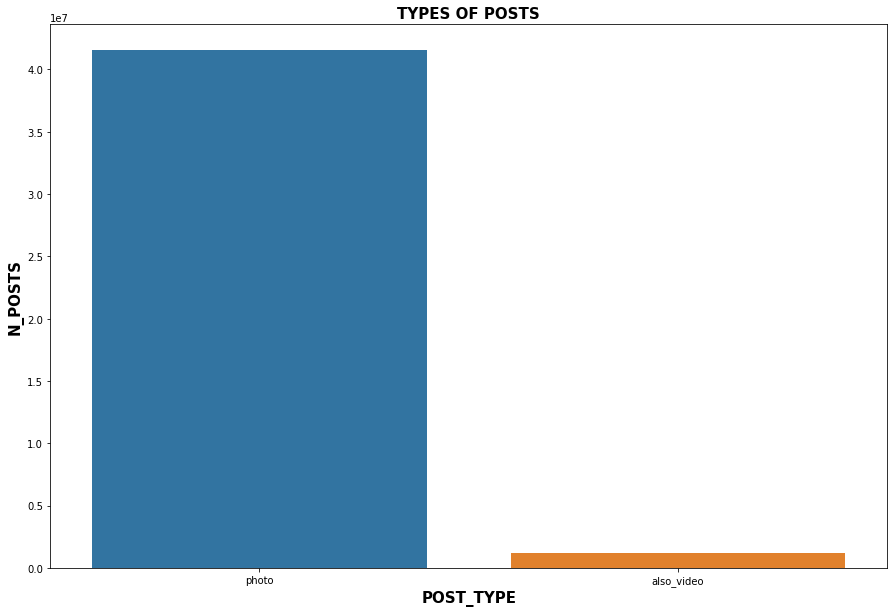

In [24]:
plt.figure(figsize=(15,10))
sns.barplot(x=['photo', 'also_video'],y=[(types['post_type'] == 1.0).sum(),(types['post_type'] > 1.0).sum()])
plt.title("TYPES OF POSTS", fontweight='bold', color = 'black', fontsize='15')
plt.xlabel('POST_TYPE', fontweight='bold', color = 'black', fontsize='15')
plt.ylabel('N_POSTS', fontweight='bold', color = 'black', fontsize='15')
plt.show()

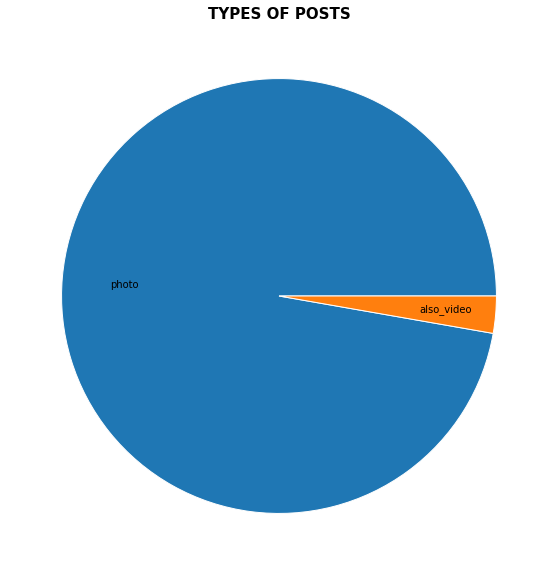

In [25]:
plt.figure(figsize=(15,10))
plt.pie([(types['post_type'] == 1.0).sum(),(types['post_type'] > 1.0).sum()],
        labels = ['photo', 'also_video'],
        labeldistance = .65,
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
plt.title("TYPES OF POSTS", fontweight='bold', color = 'black', fontsize='15')
plt.show()

#### These graphs show that almost all the posts in the dataset possess only and exclusively photos while those that possess only videos or both(multivariate post types) are a very small part of the total.

## What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage? 

In [26]:
buss_data = prof_data[['profile_name', 'is_business_account']]

In [27]:
buss_data

,profile_name,is_business_account
0,jphillip033,False
1,mama_haas,False
2,yellowlightbreen,False
3,tec1025,NaN
4,luckyfluff,NaN
...,...,...
4509581,karenarkesteyn,False
4509582,jornvlaeminck,NaN
4509583,s_degol,NaN
4509584,anwilms,False


In [28]:
nan_values = buss_data.is_business_account.isna().sum()
print(f"In this dataset there are {nan_values} NaN values that we don't want to consider in our analysis to compute the percentage of business or not business accounts")

In this dataset there are 1064263 NaN values that we don't want to consider in our analysis to compute the percentage of business or not business accounts


#### As we can see, there are many NaN values that don't give us any information if an user has a business or not business account. So we remove them from the dataset to calculate percentages only comparing True and False!!

In [29]:
buss_data.dropna()
perc_is_business = buss_data.is_business_account.value_counts(normalize=True)*100
perc_is_business

False    75.176377
True     24.823623
Name: is_business_account, dtype: float64

#### These are the percentages if an user has a business or not business account.

#### Now we show the comparison from each other with a pie plot.

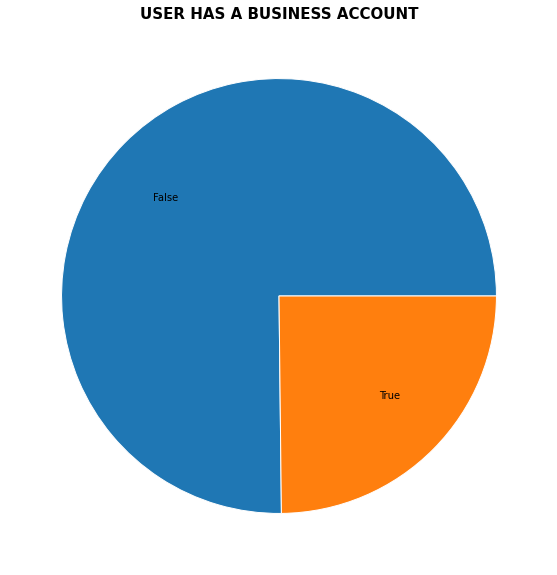

In [30]:
plt.figure(figsize=(15,10))
plt.pie(perc_is_business,
        labels = ['False', 'True'],
        labeldistance = .65,
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
plt.title("USER HAS A BUSINESS ACCOUNT", fontweight='bold', color = 'black', fontsize='15')
plt.show()

#### From this plot we can notice that in this dataset there are three times as many users who have a non-business accounts as those who do. 